In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving supply_chain_data.csv to supply_chain_data.csv


In [11]:
df = pd.read_csv('supply_chain_data.csv')
print("Shape:", df.shape)
print(df.info())
print("\nMissing values per column:\n", df.isna().sum())
df.describe(include='all').T


Shape: (100, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product type,100,3,skincare,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SKU,100,100,SKU0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,100.0,NaN,NaN,NaN,49.462461,31.168193,1.699976,19.597823,51.239831,77.198228,99.171329
Availability,100.0,NaN,NaN,NaN,48.4,30.743317,1.0,22.75,43.5,75.0,100.0
Number of products sold,100.0,NaN,NaN,NaN,460.99,303.780074,8.0,184.25,392.5,704.25,996.0
Revenue generated,100.0,NaN,NaN,NaN,5776.048187,2732.841744,1061.618523,2812.847151,6006.352023,8253.976921,9866.465458
Customer demographics,100,4,Unknown,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock levels,100.0,NaN,NaN,NaN,47.77,31.369372,0.0,16.75,47.5,73.0,100.0
Lead times,100.0,NaN,NaN,NaN,15.96,8.785801,1.0,8.0,17.0,24.0,30.0
Order quantities,100.0,NaN,NaN,NaN,49.22,26.784429,1.0,26.0,52.0,71.25,96.0


In [12]:
def kpi(x, digits=2):
    return f"{x:,.{digits}f}" if isinstance(x, float) else f"{x:,}"

kpis = {
    "Total Revenue": df['Revenue generated'].sum(),
    "Total Units Sold": df['Number of products sold'].sum(),
    "Avg Price": df['Price'].mean(),
    "Avg Shipping Cost": df['Shipping costs'].mean(),
    "Avg Lead Time": df['Lead time'].mean(),
    "Avg Defect Rate": df['Defect rates'].mean()
}
for k, v in kpis.items():
    print(f"{k:>20}: {kpi(v)}")


       Total Revenue: 577,604.82
    Total Units Sold: 46,099
           Avg Price: 49.46
   Avg Shipping Cost: 5.55
       Avg Lead Time: 17.08
     Avg Defect Rate: 2.28


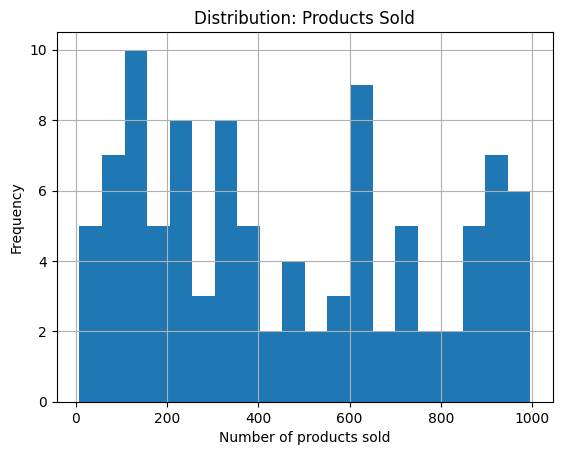

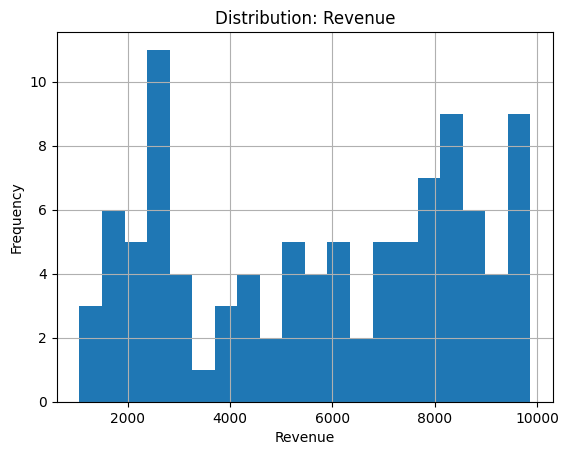

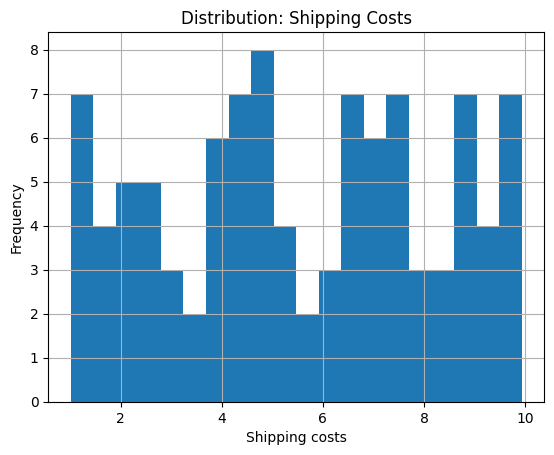

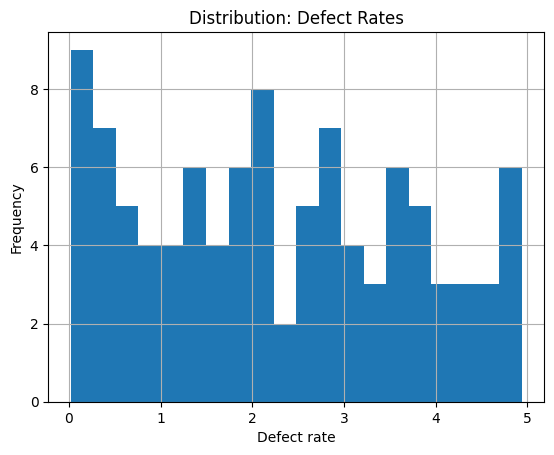

In [13]:
# Products sold
df['Number of products sold'].hist(bins=20)
plt.xlabel('Number of products sold'); plt.ylabel('Frequency'); plt.title('Distribution: Products Sold')
plt.show()

# Revenue
df['Revenue generated'].hist(bins=20)
plt.xlabel('Revenue'); plt.ylabel('Frequency'); plt.title('Distribution: Revenue')
plt.show()

# Shipping costs
df['Shipping costs'].hist(bins=20)
plt.xlabel('Shipping costs'); plt.ylabel('Frequency'); plt.title('Distribution: Shipping Costs')
plt.show()

# Defect rates
df['Defect rates'].hist(bins=20)
plt.xlabel('Defect rate'); plt.ylabel('Frequency'); plt.title('Distribution: Defect Rates')
plt.show()


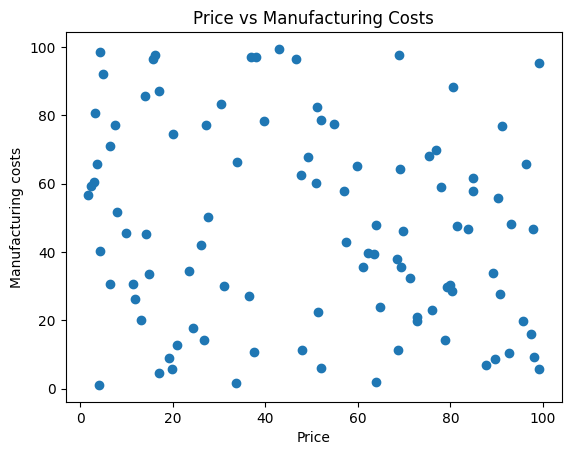

Correlation between Costs & Revenue: 0.027


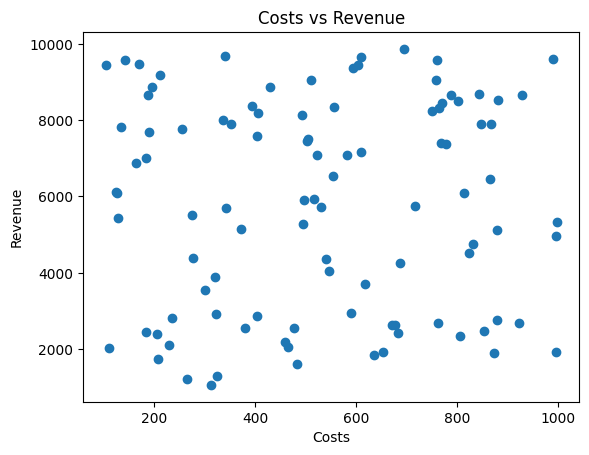

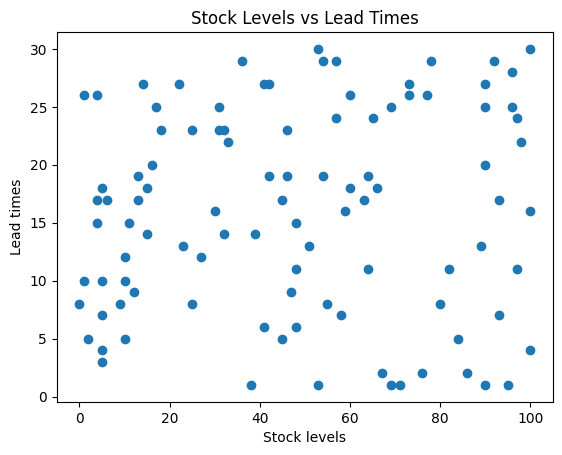

In [14]:
# Price vs Manufacturing costs
plt.scatter(df['Price'], df['Manufacturing costs'])
plt.xlabel('Price'); plt.ylabel('Manufacturing costs'); plt.title('Price vs Manufacturing Costs')
plt.show()

# Costs vs Revenue
corr = df[['Costs','Revenue generated']].corr().iloc[0,1]
print(f"Correlation between Costs & Revenue: {corr:.3f}")
plt.scatter(df['Costs'], df['Revenue generated'])
plt.xlabel('Costs'); plt.ylabel('Revenue'); plt.title('Costs vs Revenue')
plt.show()

# Stock vs Lead Times
plt.scatter(df['Stock levels'], df['Lead times'])
plt.xlabel('Stock levels'); plt.ylabel('Lead times'); plt.title('Stock Levels vs Lead Times')
plt.show()


Product type
skincare     241628.162133
haircare     174455.390605
cosmetics    161521.265999
Name: Revenue generated, dtype: float64


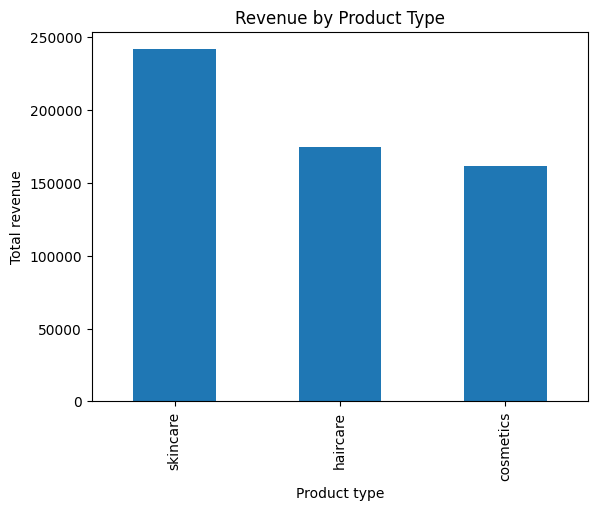

In [15]:
rev_by_pt = df.groupby('Product type')['Revenue generated'].sum().sort_values(ascending=False)
print(rev_by_pt)
rev_by_pt.plot(kind='bar', title='Revenue by Product Type')
plt.ylabel('Total revenue'); plt.show()


Inspection results
Pass       572.836117
Pending    520.471193
Fail       511.389683
Name: Costs, dtype: float64


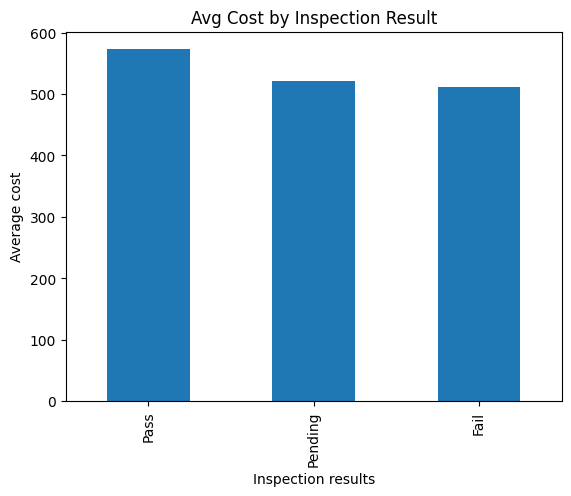

In [16]:
cost_by_insp = df.groupby('Inspection results')['Costs'].mean().sort_values(ascending=False)
print(cost_by_insp)
cost_by_insp.plot(kind='bar', title='Avg Cost by Inspection Result')
plt.ylabel('Average cost'); plt.show()


Supplier name
Supplier 1    574.851139
Supplier 5    536.022730
Supplier 4    521.810418
Supplier 2    515.027241
Supplier 3    468.800102
Name: Costs, dtype: float64


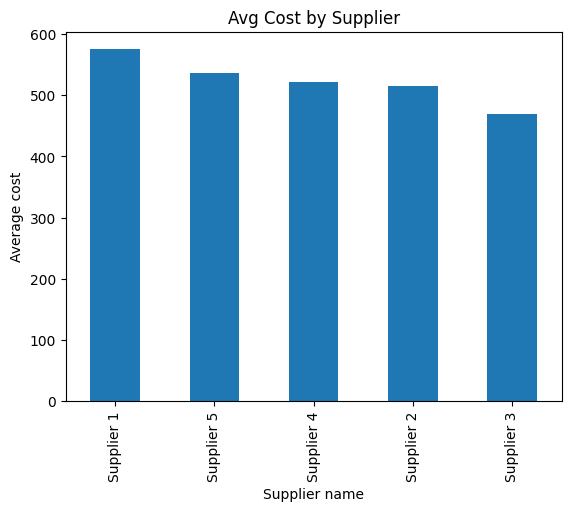

In [17]:
cost_by_supplier = df.groupby('Supplier name')['Costs'].mean().sort_values(ascending=False)
print(cost_by_supplier)
cost_by_supplier.plot(kind='bar', title='Avg Cost by Supplier')
plt.ylabel('Average cost'); plt.show()


Transportation modes
Road    1386
Rail    1342
Air     1341
Sea      853
Name: Order quantities, dtype: int64


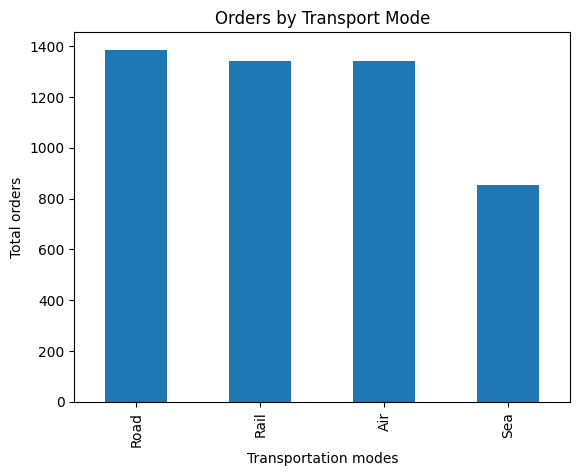

In [18]:
orders_by_mode = df.groupby('Transportation modes')['Order quantities'].sum().sort_values(ascending=False)
print(orders_by_mode)
orders_by_mode.plot(kind='bar', title='Orders by Transport Mode')
plt.ylabel('Total orders'); plt.show()


Product type
haircare     2.483150
skincare     2.334681
cosmetics    1.919287
Name: Defect rates, dtype: float64


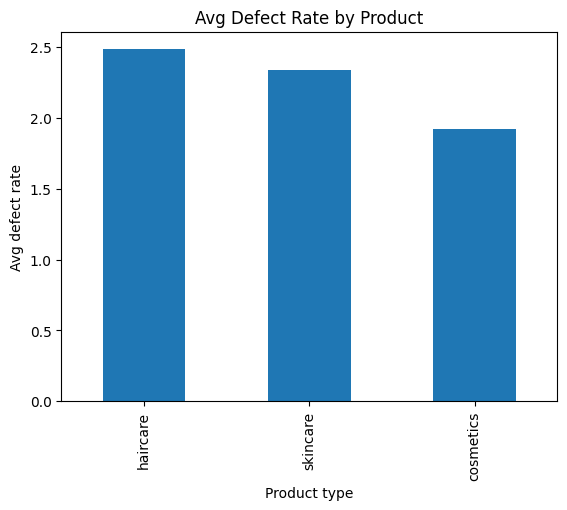

In [19]:
defect_by_prod = df.groupby('Product type')['Defect rates'].mean().sort_values(ascending=False)
print(defect_by_prod)
defect_by_prod.plot(kind='bar', title='Avg Defect Rate by Product')
plt.ylabel('Avg defect rate'); plt.show()


                   total_rev    total_cost  efficiency
Supplier name                                         
Supplier 3      97795.979638   7032.001523   13.907275
Supplier 5     110343.463656   9648.409132   11.436441
Supplier 2     125467.418605  11330.599298   11.073326
Supplier 1     157528.995039  15520.980745   10.149423
Supplier 4      86468.961799   9392.587517    9.206085


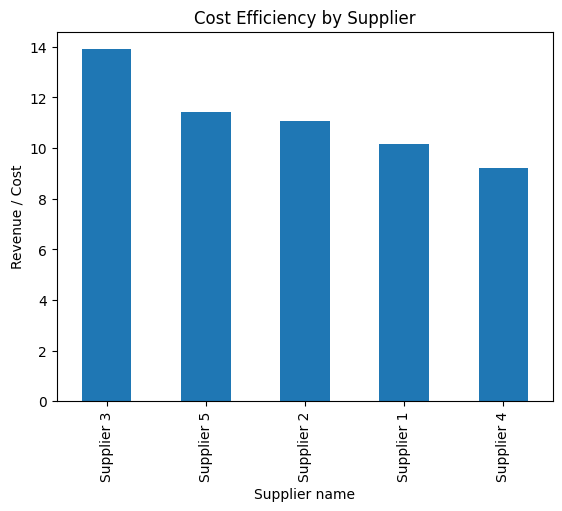

In [20]:
agg = df.groupby('Supplier name').agg(total_rev=('Revenue generated','sum'),
                                      total_cost=('Costs','sum'))
agg['efficiency'] = agg['total_rev'] / agg['total_cost']
print(agg.sort_values('efficiency', ascending=False))
agg['efficiency'].sort_values(ascending=False).plot(kind='bar', title='Cost Efficiency by Supplier')
plt.ylabel('Revenue / Cost'); plt.show()


Product type
haircare     18.705882
skincare     18.000000
cosmetics    13.538462
Name: Lead time, dtype: float64


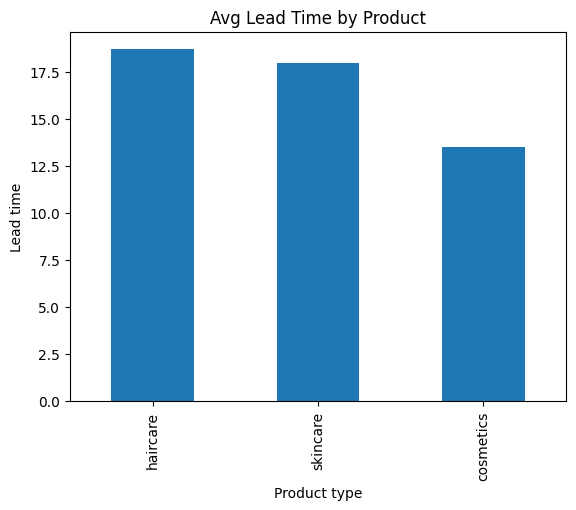

In [21]:
lead_by_prod = df.groupby('Product type')['Lead time'].mean().sort_values(ascending=False)
print(lead_by_prod)
lead_by_prod.plot(kind='bar', title='Avg Lead Time by Product')
plt.ylabel('Lead time'); plt.show()


Routes
Route A    43
Route B    37
Route C    20
Name: count, dtype: int64


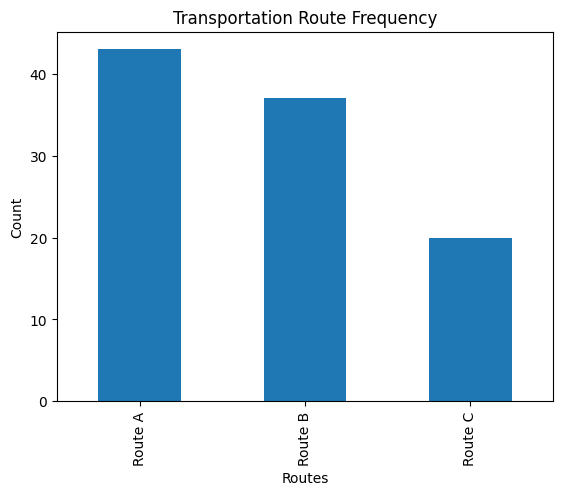

In [22]:
route_freq = df['Routes'].value_counts()
print(route_freq)
route_freq.plot(kind='bar', title='Transportation Route Frequency')
plt.ylabel('Count'); plt.show()


Shipping carriers
Carrier C    5.599292
Carrier A    5.554923
Carrier B    5.509247
Name: Shipping costs, dtype: float64


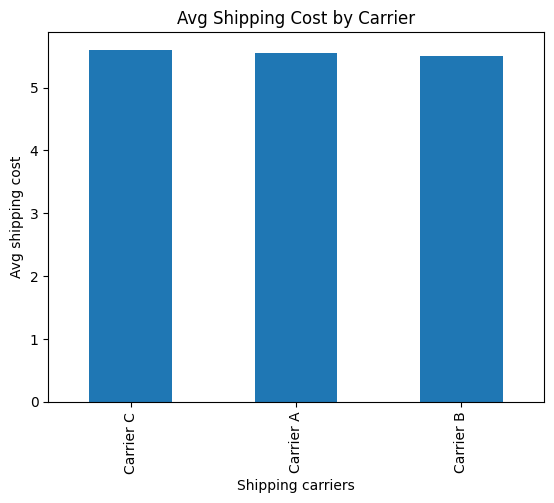

In [23]:
ship_cost_carrier = df.groupby('Shipping carriers')['Shipping costs'].mean().sort_values(ascending=False)
print(ship_cost_carrier)
ship_cost_carrier.plot(kind='bar', title='Avg Shipping Cost by Carrier')
plt.ylabel('Avg shipping cost'); plt.show()


Location
Kolkata      15451
Mumbai       13160
Chennai      11984
Delhi         8362
Bangalore     7827
Name: Production volumes, dtype: int64


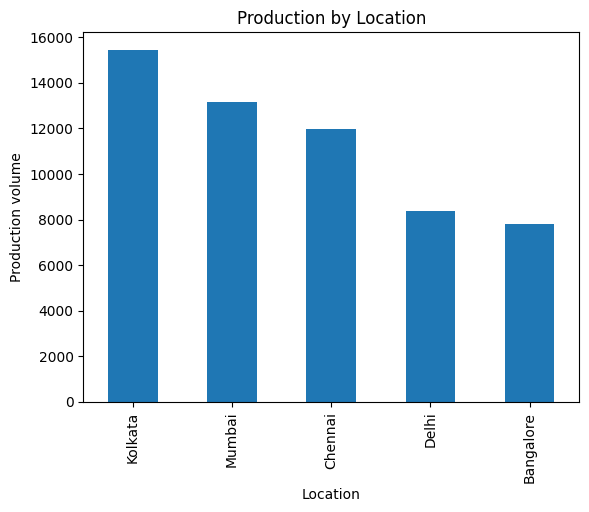

In [24]:
prod_by_loc = df.groupby('Location')['Production volumes'].sum().sort_values(ascending=False)
print(prod_by_loc)
prod_by_loc.plot(kind='bar', title='Production by Location')
plt.ylabel('Production volume'); plt.show()


/tmp/ipython-input-1510214239.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels)


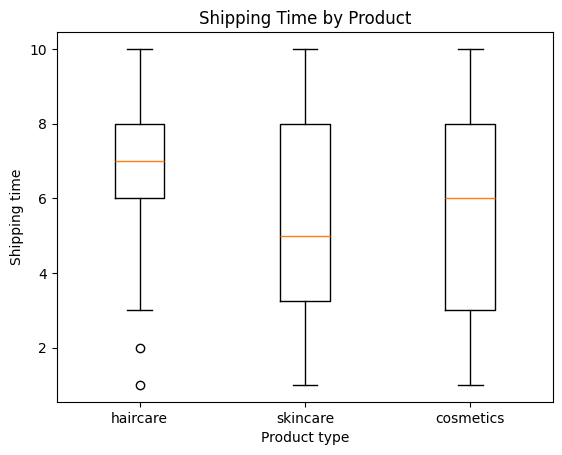

In [25]:
groups = [g['Shipping times'].dropna().values for _, g in df.groupby('Product type')]
labels = df['Product type'].unique()
plt.boxplot(groups, labels=labels)
plt.xlabel('Product type'); plt.ylabel('Shipping time'); plt.title('Shipping Time by Product')
plt.show()


Supplier name
Supplier 5    2.665408
Supplier 3    2.465786
Supplier 2    2.362750
Supplier 4    2.337397
Supplier 1    1.803630
Name: Defect rates, dtype: float64


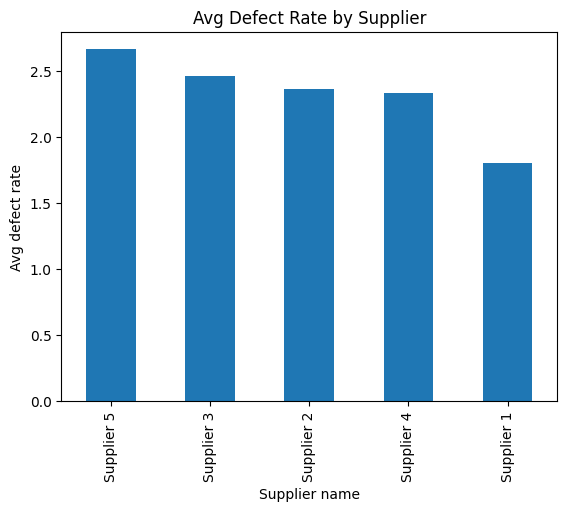

Inspection results
Pending    41.0
Fail       36.0
Pass       23.0
Name: proportion, dtype: float64


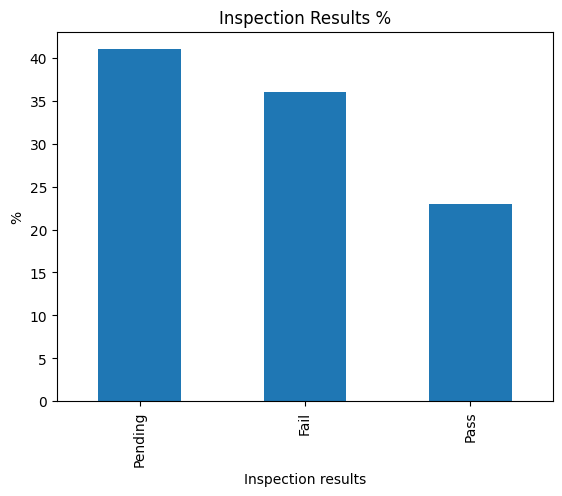

               avg_lead_time  avg_defect_rate    avg_cost  avg_shipping_time
Supplier name                                                               
Supplier 1         14.777778         1.803630  574.851139           6.074074
Supplier 2         18.545455         2.362750  515.027241           5.500000
Supplier 3         20.133333         2.465786  468.800102           5.200000
Supplier 4         15.222222         2.337397  521.810418           5.555556
Supplier 5         18.055556         2.665408  536.022730           6.222222


In [26]:
# Defect rate by supplier
defect_by_supplier = df.groupby('Supplier name')['Defect rates'].mean().sort_values(ascending=False)
print(defect_by_supplier)
defect_by_supplier.plot(kind='bar', title='Avg Defect Rate by Supplier')
plt.ylabel('Avg defect rate'); plt.show()

# Inspection result distribution
insp_dist = df['Inspection results'].value_counts(normalize=True) * 100
print(insp_dist)
insp_dist.plot(kind='bar', title='Inspection Results %')
plt.ylabel('%'); plt.show()

# Supplier performance matrix
perf = df.groupby('Supplier name').agg(
    avg_lead_time=('Lead time','mean'),
    avg_defect_rate=('Defect rates','mean'),
    avg_cost=('Costs','mean'),
    avg_shipping_time=('Shipping times','mean')
)
print(perf)


Transportation modes
Air     154.730769
Sea      75.264706
Road     71.689655
Rail     47.928571
Name: EmissionsImpact, dtype: float64


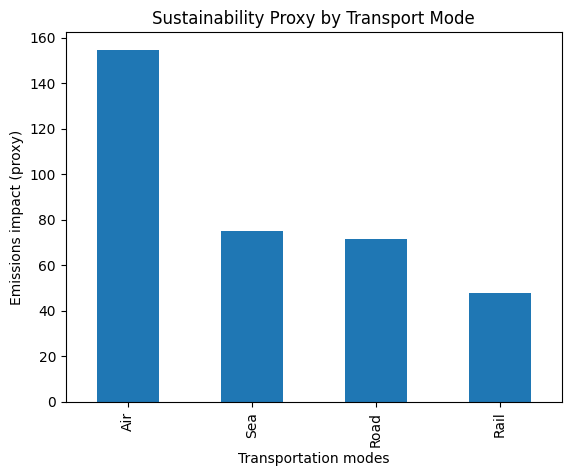

In [27]:
emission_factor = {'Air': 3.0, 'Road': 1.5, 'Rail': 1.0}
df['EmissionsIndex'] = df['Transportation modes'].map(emission_factor).fillna(1.5)
df['EmissionsImpact'] = df['EmissionsIndex'] * df['Order quantities']

emis_by_mode = df.groupby('Transportation modes')['EmissionsImpact'].mean().sort_values(ascending=False)
print(emis_by_mode)
emis_by_mode.plot(kind='bar', title='Sustainability Proxy by Transport Mode')
plt.ylabel('Emissions impact (proxy)'); plt.show()


In [29]:
print("INSIGHTS:")
print("- Skincare is top revenue driver.")
print("- Kolkata and Mumbai lead in production and orders.")
print("- Carrier B is fastest, Carrier A costlier.")
print("- Supplier 5 has highest defects and lead time; Supplier 1 best overall.")
print("- Route B is costliest; Routes A/C cheaper.")
print("- Air transport has highest emissions proxy; Rail lowest.")


INSIGHTS:
- Skincare is top revenue driver.
- Kolkata and Mumbai lead in production and orders.
- Carrier B is fastest, Carrier A costlier.
- Supplier 5 has highest defects and lead time; Supplier 1 best overall.
- Route B is costliest; Routes A/C cheaper.
- Air transport has highest emissions proxy; Rail lowest.
